<a href="https://colab.research.google.com/github/joynaomi81/Emotion-Recognition-in-Text/blob/main/Emotion_Recognition_in_Text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Steps**
1. Important necessary libraries.
2. Load dataset
3. Data review
4. Data cleaning
5. Data visualization
6. Statistical analysis
7. Text pre-processing
8. Split data into training and test sets
9.  Model training
10. Model evaluation
11. Save the model.
12. Deployment.

## 1. **Important necessary libraries.**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
%matplotlib inline

## 2. **Load dataset.**

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/emotion-dataset.csv')

## **3. Data review**

In [ ]:
df.head() # Check for the first 5 rows

,Emotion,Text
0,neutral,Why ?
1,joy,Sage Act upgrade on my to do list for tommorow.
2,sadness,ON THE WAY TO MY HOMEGIRL BABY FUNERAL!!! MAN ...
3,joy,Such an eye ! The true hazel eye-and so brill...
4,joy,@Iluvmiasantos ugh babe.. hugggzzz for u .! b...


In [ ]:
df.tail() # Check for the last 5 rows

,Emotion,Text
34787,surprise,@MichelGW have you gift! Hope you like it! It'...
34788,joy,The world didnt give it to me..so the world MO...
34789,anger,A man robbed me today .
34790,fear,"Youu call it JEALOUSY, I call it of #Losing YO..."
34791,sadness,"I think about you baby, and I dream about you ..."


In [ ]:
df.shape # Check for the shape of the dataset

(34792, 2)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34792 entries, 0 to 34791
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Emotion  34792 non-null  object
 1   Text     34792 non-null  object
dtypes: object(2)
memory usage: 543.8+ KB


In [ ]:
df.columns # Check for the columns

Index(['Emotion', 'Text'], dtype='object')

In [ ]:
df['Emotion'].value_counts()

,count
Emotion,
joy,11045
sadness,6722
fear,5410
anger,4297
surprise,4062
neutral,2254
disgust,856
shame,146


## 4. **Data cleaning**

In [ ]:
# Check for missing values using isnull()
df.isnull().sum()

,0
Emotion,0
Text,0


In [ ]:
# Checking for duplicate rows in the DataFrame
df.duplicated().sum()

3630

In [ ]:
# Drop duplicates rows
df = df.drop_duplicates()
df.duplicated().sum()

0

In [ ]:
# Check for the new data shape
df.shape

(31162, 2)

## 5. **Data visualization**

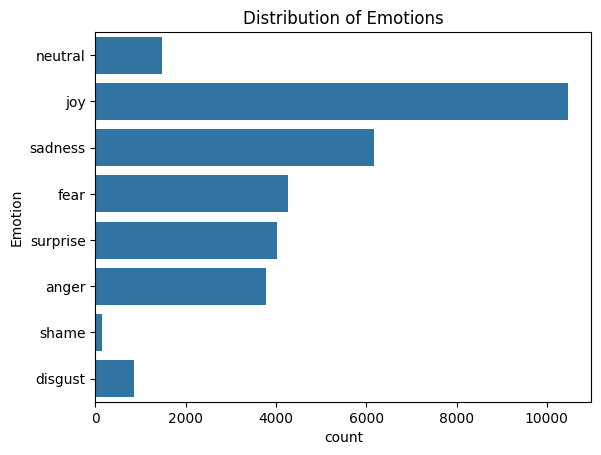

In [ ]:
sns.countplot(df['Emotion'])
plt.title('Distribution of Emotions')
plt.show()

* The y-axis shows different emotions, such as neutral, joy, sadness, fear, surprise, anger, shame, and disgust.
* The x-axis represents the count(frequency) of occurrences for each emotion.
* From the plot 'shame emotion' has the lowest count and the highest count is 'joy emotion'

## 6. **Statistical** **analysis**

In [ ]:
# Calculate frequency counts of each emotion
emotion_counts = df['Emotion'].value_counts()
print(emotion_counts)

Emotion
joy         10464
sadness      6175
fear         4266
surprise     4015
anger        3777
neutral      1466
disgust       855
shame         144
Name: count, dtype: int64


In [ ]:
# The descriptive statistics
print(df['Emotion'].describe())


count     31162
unique        8
top         joy
freq      10464
Name: Emotion, dtype: object


## 7. **Text** **preprocessing**

In [ ]:
df['Text'] = df['Text'].str.lower() # Convert data into lowercase
df['Text'] = df['Text'].apply(lambda x: re.sub('[^a-zA-Z]', ' ', x)) # Remove special characters
def remove_punctuations(text):
  punctuations = '''!()-[]{};:'"\,<>./?@#$%^&*_~'''
  for x in text:
    if x in punctuations:
      text = text.replace(x, "")
  return text
df['Text'] = df['Text'].apply(remove_punctuations) # Remove punctuations
df.head()

,Emotion,Text
0,neutral,why
1,joy,sage act upgrade on my to do list for tommorow
2,sadness,on the way to my homegirl baby funeral man ...
3,joy,such an eye the true hazel eye and so brill...
4,joy,iluvmiasantos ugh babe hugggzzz for u b...


In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
words = set(stopwords.words('english'))
def remove_stopwords(text):
  return " ".join([word for word in str(text).split() if word not in words])

df['Text'] = df['Text'].apply(lambda a: remove_stopwords(a))
df.head()

,Emotion,Text
0,neutral,
1,joy,sage act upgrade list tommorow
2,sadness,way homegirl baby funeral man hate funerals re...
3,joy,eye true hazel eye brilliant regular features ...
4,joy,iluvmiasantos ugh babe hugggzzz u babe naamaze...


In [ ]:
def remove_urls(text):
  return re.sub(r'https?://\S+|www\.\S+', '', text) # remove urls

df['Text'] = df['Text'].apply(lambda a: remove_urls(a))

In [ ]:
def remove_html_tags(text):
  return re.sub(r'<.*?>', '', text)

df['Text'] = df['Text'].apply(lambda a: remove_html_tags(a))
df.head()

,Emotion,Text
0,neutral,
1,joy,sage act upgrade list tommorow
2,sadness,way homegirl baby funeral man hate funerals re...
3,joy,eye true hazel eye brilliant regular features ...
4,joy,iluvmiasantos ugh babe hugggzzz u babe naamaze...


Splitting the data features and target variables.
* x = Features which is the 'Text' column.
* y = Labels which is the 'emotion' column.

In [ ]:
x = df['Text']
y = df['Emotion']

## 8. Split the data into training and test sets

In [ ]:
# Split the data into training and test sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## 9. **Model** **Training**

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression

In [ ]:
pipe_lr = Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())]) # Automatically convert the data into numerical vectors and apply lr algorithm
pipe_lr.fit(x_train, y_train) # Train the model

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

## 10. **Model** **evaluation**

In [ ]:
# Evaluate the model and print the accuracy
accuracy = pipe_lr.score(x_test, y_test)
print(f'Accuracy of the model: {accuracy:.2f}')


Accuracy of the model: 0.58


In [ ]:
from sklearn.metrics import accuracy_score, classification_report
report = classification_report(y_test, y_pred)

In [ ]:
# Print classification report and accuracy
print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.5831639747566585
Classification Report:
              precision    recall  f1-score   support

       anger       0.54      0.49      0.51      1105
     disgust       0.64      0.24      0.35       259
        fear       0.68      0.57      0.62      1314
         joy       0.60      0.77      0.67      3068
     neutral       0.48      0.49      0.48       438
     sadness       0.55      0.51      0.53      1906
       shame       0.81      0.66      0.72        38
    surprise       0.55      0.44      0.49      1221

    accuracy                           0.58      9349
   macro avg       0.61      0.52      0.55      9349
weighted avg       0.58      0.58      0.58      9349



New Prediction

In [ ]:
prediction = ["I am extremely excited about this!",
            "He shocked me with a car."]

# Make predictions using the trained pipeline
predictions = pipe_lr.predict(new_data)

# print prediction
for text, pred in zip(prediction, predictions):
    print(f'Text: "{text}" -> Predicted Emotion: {pred}')


Text: "I am extremely excited about this!" -> Predicted Emotion: joy
Text: "He shocked me with a car." -> Predicted Emotion: surprise


## 11. **Save the model**

In [ ]:
import joblib
pipe_file = open('model.pkl', 'wb')
joblib.dump(pipe_lr,pipe_file)
pipe_file.close()

## 12. **Model deployment**
###### Deploy the model as a web app using streamlit